In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

energy = pd.read_csv("raw_energy_data.csv")
print(energy.head())

  Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential            7063                   76               10   
1    Commercial           44372                   66               45   
2    Industrial           19255                   37               17   
3   Residential           13265                   14               41   
4    Commercial           13375                   26               18   

   Average Temperature Day of Week  Energy Consumption  
0                29.84     Weekday             2713.95  
1                16.72     Weekday             5744.99  
2                14.30     Weekend             4101.24  
3                32.82     Weekday             3009.14  
4                11.92     Weekday             3279.17  


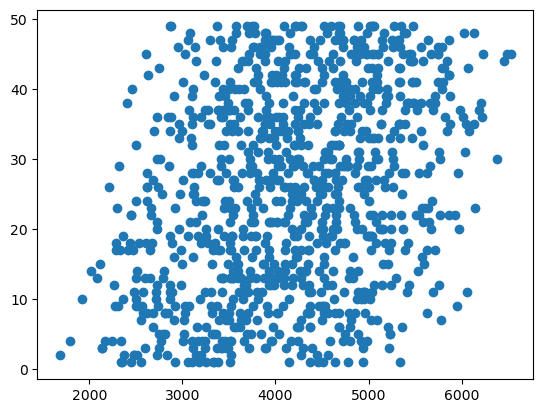

<Figure size 640x480 with 0 Axes>

In [13]:
# Modeling the relationship between energy consumption number and appliances used
plt.scatter( energy.appliances, energy.consumed)
plt.show()
plt.clf()

In [60]:
# Building and fitting a model to predict energy consumption based on the number of used appliances 
energy = pd.read_csv("raw_energy_data.csv")
energy.rename(columns={'Energy Consumption': 'consumed'}, inplace=True)
energy.rename(columns={'Appliances Used': 'appliances'}, inplace=True)
print(energy.head())
results = (sm.OLS.from_formula('consumed ~ appliances', energy)).fit()

print(results.params)
# Intercept of 3636.28 indicates an energy consumption considering 0 appliances used. Slope of  20.6 indicates that 1 more appliance would add 20.69 points of consumed energy.

  Building Type  Square Footage  Number of Occupants  appliances  \
0   Residential            7063                   76          10   
1    Commercial           44372                   66          45   
2    Industrial           19255                   37          17   
3   Residential           13265                   14          41   
4    Commercial           13375                   26          18   

   Average Temperature Day of Week  consumed  
0                29.84     Weekday   2713.95  
1                16.72     Weekday   5744.99  
2                14.30     Weekend   4101.24  
3                32.82     Weekday   3009.14  
4                11.92     Weekday   3279.17  
Intercept     3636.288881
appliances      20.696856
dtype: float64


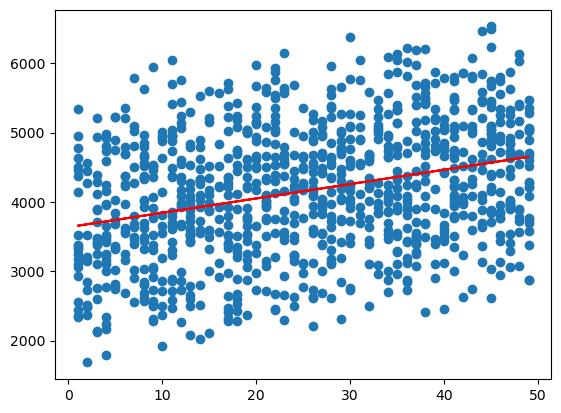

<Figure size 640x480 with 0 Axes>

In [72]:
# Plotting the regression in our previously created scatter plot 
plt.scatter(energy.appliances, energy.consumed)
plt.plot(energy.appliances, results.predict(energy), color = 'r')
plt.show()
plt.clf()

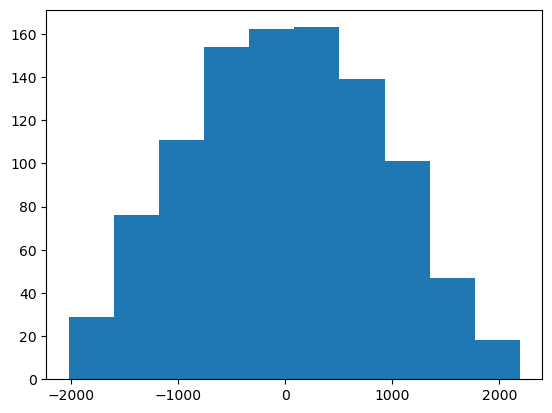

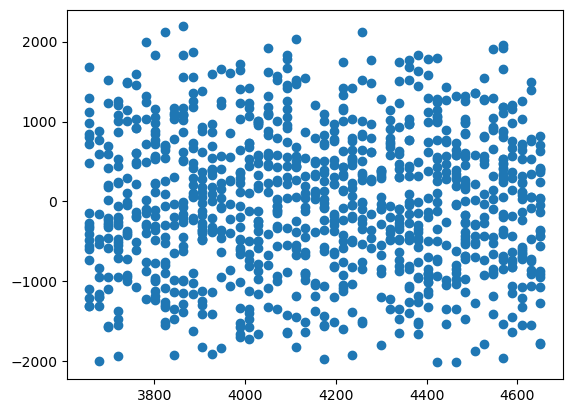

In [82]:
# What are the fitted values and residuals? Verifying the assumptions for the model
fitted_values = results.predict(energy)
residuals = energy.consumed - fitted_values 
plt.hist(residuals)
plt.show()
plt.clf()
# histogram looks normal, residuals look approximately normally distributed 
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf()
# scatterplot of fitted values and residuals seems to be centered around 0 axis - homoscedasticity assumption is met

In [92]:
# predicting consumed energy for individual building that uses 3 appliances 
results = (sm.OLS.from_formula('consumed ~ appliances', energy)).fit()
print(3 * 20.6 + 3636.28)
# what about 50 appliances?
print(50 * 20.6 + 3636.28)


3698.0800000000004
4666.280000000001
